In [16]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Load dataset
df = pd.read_csv("/mnt/data/Crimes_against_women.csv")

# Convert categorical columns (State, District) to numerical values
label_encoder = LabelEncoder()
df['State'] = label_encoder.fit_transform(df['State'])

# Selecting crime rate features instead of raw counts
crime_features = ['Rape', 'Kidnapping and Abduction', 'Dowry Deaths', 'Assault', 'Insult to Modesty', 'Cruelty by Husband']

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[crime_features])

# Using Elbow Method for optimal k
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8,5))
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

# Optimal Clusters from Hierarchical Clustering
linked = linkage(df_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()

# Applying K-Means with optimal k
optimal_k = 3  # Adjust based on Elbow method
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
df['Cluster_KMeans'] = kmeans.fit_predict(df_scaled)

# Applying DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['Cluster_DBSCAN'] = dbscan.fit_predict(df_scaled)

# Display the updated DataFrame with cluster assignments
print(df[['State', 'Cluster_KMeans', 'Cluster_DBSCAN']].head())
        

In [9]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

In [2]:
df = pd.read_csv(r"E:\Crimes_against_women.csv")
df.head()

,STATE,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on Women,Insult to Modesty of Women,Cruelty by Husband or His Relatives
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247


In [4]:
df.isnull

<bound method DataFrame.isnull of                 STATE           DISTRICT  Year  Rape  \
0      ANDHRA PRADESH           ADILABAD  2001    50   
1      ANDHRA PRADESH          ANANTAPUR  2001    23   
2      ANDHRA PRADESH           CHITTOOR  2001    27   
3      ANDHRA PRADESH           CUDDAPAH  2001    20   
4      ANDHRA PRADESH      EAST GODAVARI  2001    23   
...               ...                ...   ...   ...   
10672     Lakshadweep        Lakshadweep  2014     1   
10673     Lakshadweep  Total District(s)  2014     1   
10674      Puducherry           Karaikal  2014     3   
10675      Puducherry         Puducherry  2014     7   
10676      Puducherry  Total District(s)  2014    10   

       Kidnapping and Abduction  Dowry Deaths  Assault on Women  \
0                            30            16               149   
1                            30             7               118   
2                            34            14               112   
3                        

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10677 entries, 0 to 10676
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   STATE                                10677 non-null  object
 1   DISTRICT                             10677 non-null  object
 2   Year                                 10677 non-null  int64 
 3   Rape                                 10677 non-null  int64 
 4   Kidnapping and Abduction             10677 non-null  int64 
 5   Dowry Deaths                         10677 non-null  int64 
 6   Assault on Women                     10677 non-null  int64 
 7   Insult to Modesty of Women           10677 non-null  int64 
 8   Cruelty by Husband or His Relatives  10677 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 750.9+ KB


In [6]:
df.isnull().sum()

STATE                                  0
DISTRICT                               0
Year                                   0
Rape                                   0
Kidnapping and Abduction               0
Dowry Deaths                           0
Assault on Women                       0
Insult to Modesty of Women             0
Cruelty by Husband or His Relatives    0
dtype: int64

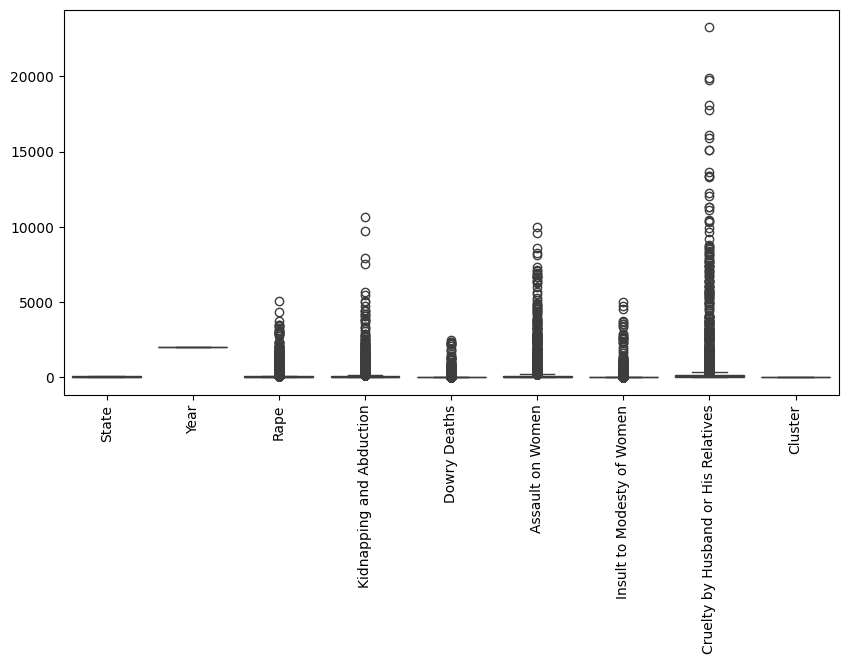

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


In [7]:
data = df.iloc[: , [2 ,3]].values
print(data)

[[2001   50]
 [2001   23]
 [2001   27]
 ...
 [2014    3]
 [2014    7]
 [2014   10]]


In [10]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

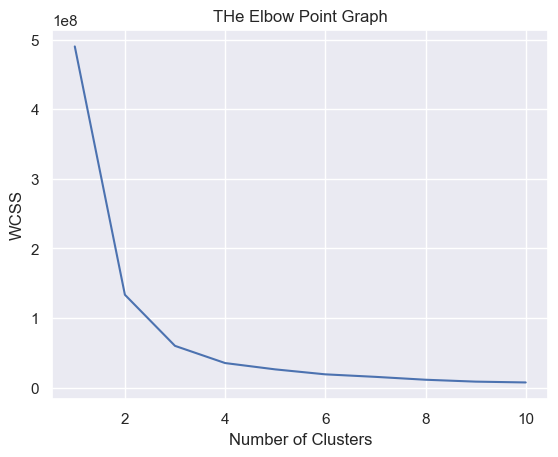

In [14]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('THe Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
df = pd.read_csv(r"E:\Crimes_against_women.csv")
df.head()

[0 0 0 ... 0 0 0]


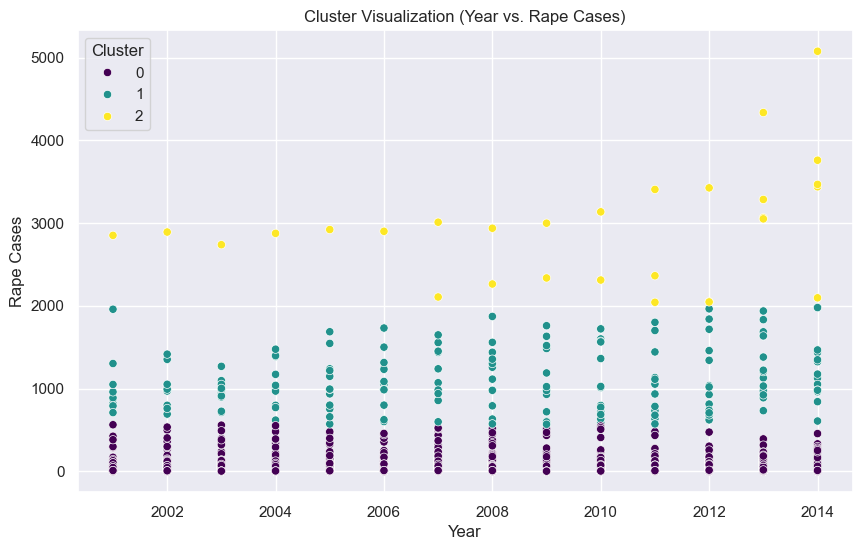

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Year"], y=df["Rape"], hue=df["Cluster"], palette="viridis")
plt.title("Cluster Visualization (Year vs. Rape Cases)")
plt.xlabel("Year")
plt.ylabel("Rape Cases")
plt.legend(title="Cluster")
plt.show()

In [18]:
print(df.columns)

Index(['STATE', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on Women', 'Insult to Modesty of Women',
       'Cruelty by Husband or His Relatives'],
      dtype='object')


In [20]:
df.isnull

In [34]:
data2 = df.iloc[: , [2 ,4]].values
print(data2)

[[2001   30]
 [2001   30]
 [2001   34]
 ...
 [2014    1]
 [2014    6]
 [2014    7]]


In [35]:
df.info()

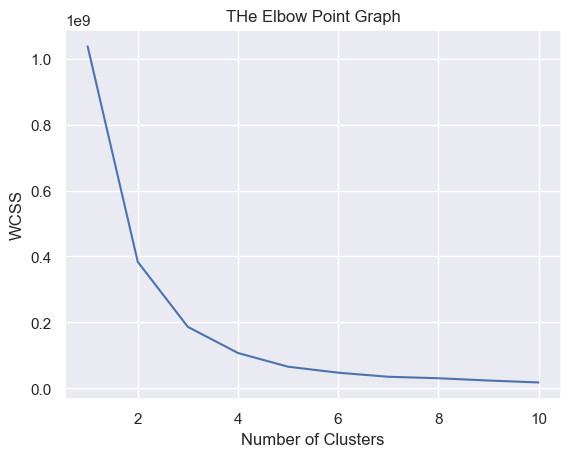

In [36]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('THe Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [1]:
pip install kneed


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


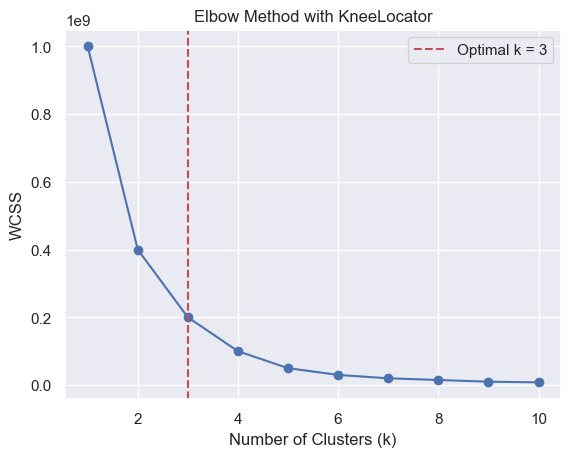

The optimal number of clusters (k) is: 3


In [39]:
df.isnull().sum()

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


[0 0 0 ... 0 0 0]


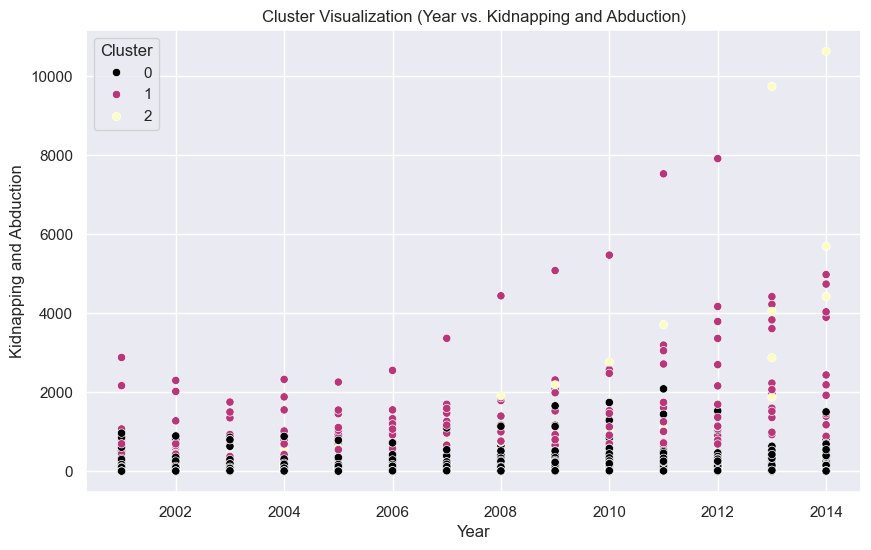

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Year"], y=df["Kidnapping and Abduction"], hue=df["Cluster"], palette="magma")
plt.title("Cluster Visualization (Year vs. Kidnapping and Abduction)")
plt.xlabel("Year")
plt.ylabel("Kidnapping and Abduction")
plt.legend(title="Cluster")
plt.show()

In [6]:
data3 = df.iloc[: , [2 ,5]].values
print(data3)

[[2001   16]
 [2001    7]
 [2001   14]
 ...
 [2014    0]
 [2014    1]
 [2014    1]]


In [9]:
data = df.iloc[: , [2 ,3]].values
print(data)

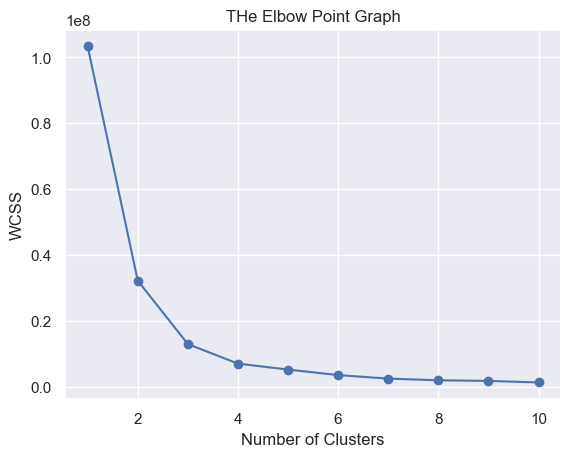

In [41]:
sns.set()
plt.plot(range(1,11),wcss, marker='o')
plt.title('THe Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Load dataset
df = pd.read_csv("/mnt/data/Crimes_against_women.csv")

# Convert categorical columns (State, District) to numerical values
label_encoder = LabelEncoder()
df['State'] = label_encoder.fit_transform(df['State'])

# Selecting crime rate features instead of raw counts
crime_features = ['Rape', 'Kidnapping and Abduction', 'Dowry Deaths', 'Assault', 'Insult to Modesty', 'Cruelty by Husband']

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[crime_features])

# Using Elbow Method for optimal k
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8,5))
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

# Optimal Clusters from Hierarchical Clustering
linked = linkage(df_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()

# Applying K-Means with optimal k
optimal_k = 3  # Adjust based on Elbow method
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
df['Cluster_KMeans'] = kmeans.fit_predict(df_scaled)

# Applying DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['Cluster_DBSCAN'] = dbscan.fit_predict(df_scaled)

# Display the updated DataFrame with cluster assignments
print(df[['State', 'Cluster_KMeans', 'Cluster_DBSCAN']].head())
        

In [54]:
print(df.columns)

Index(['STATE', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on Women', 'Insult to Modesty of Women',
       'Cruelty by Husband or His Relatives', 'Cluster'],
      dtype='object')


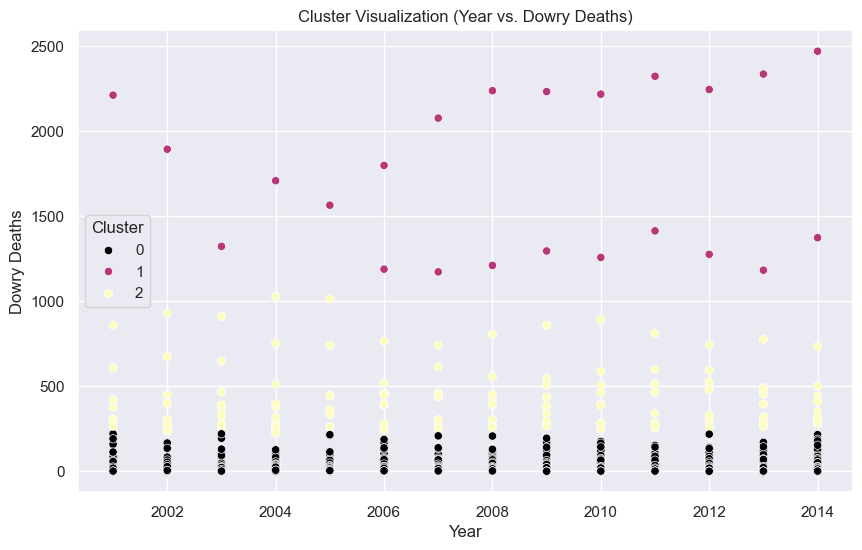

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Year"], y=df["Dowry Deaths"], hue=df["Cluster"], palette="magma")
plt.title("Cluster Visualization (Year vs. Dowry Deaths)")
plt.xlabel("Year")
plt.ylabel("Dowry Deaths")
plt.show()


In [4]:
data_4 = df.iloc[: , [2 ,6]].values
print(data_4)

[[2001  149]
 [2001  118]
 [2001  112]
 ...
 [2014   12]
 [2014   20]
 [2014   32]]


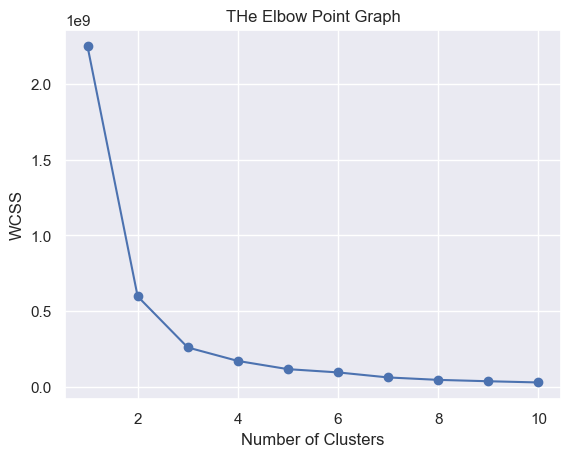

In [14]:
sns.set()
plt.plot(range(1,11),wcss, marker='o')
plt.title('THe Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

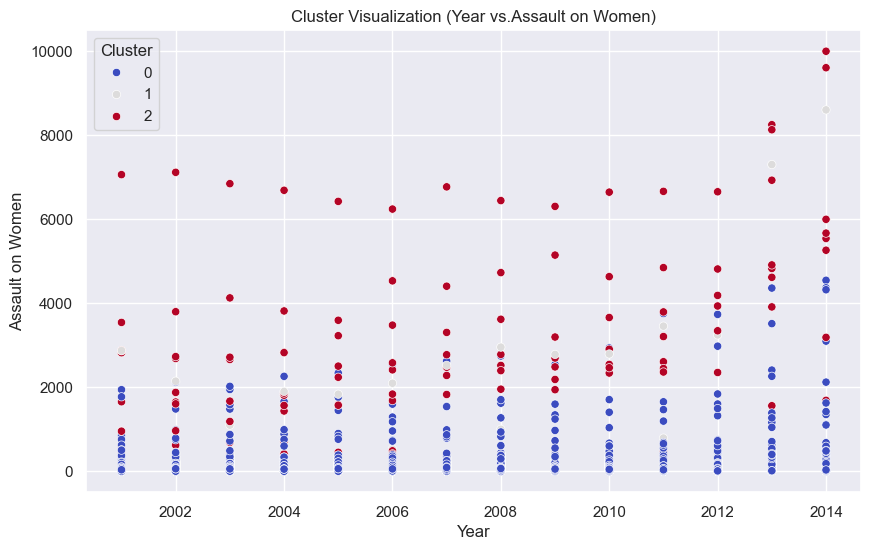

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Year"], y=df["Assault on Women"], hue=df["Cluster"], palette="coolwarm")
plt.title("Cluster Visualization (Year vs.Assault on Women)")
plt.xlabel("Year")
plt.ylabel("Assault on Women")
plt.legend(title='Cluster')
plt.show()

In [22]:
data_5 = df.iloc[: , [2 ,7]].values
print(data_5)

[[2001   34]
 [2001   24]
 [2001   83]
 ...
 [2014    1]
 [2014    7]
 [2014    8]]


In [23]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('THe Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

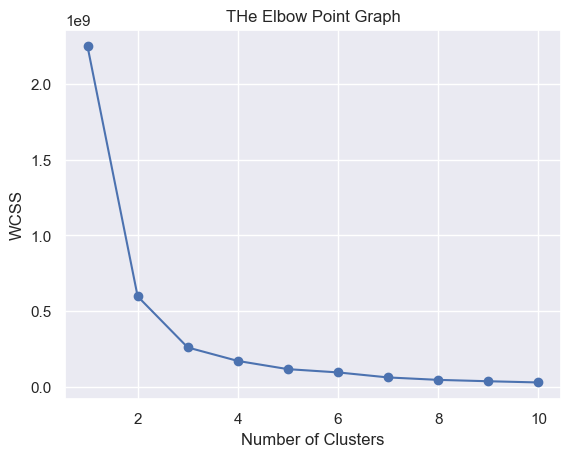

In [24]:
sns.set()
plt.plot(range(1,11),wcss, marker='o')
plt.title('THe Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

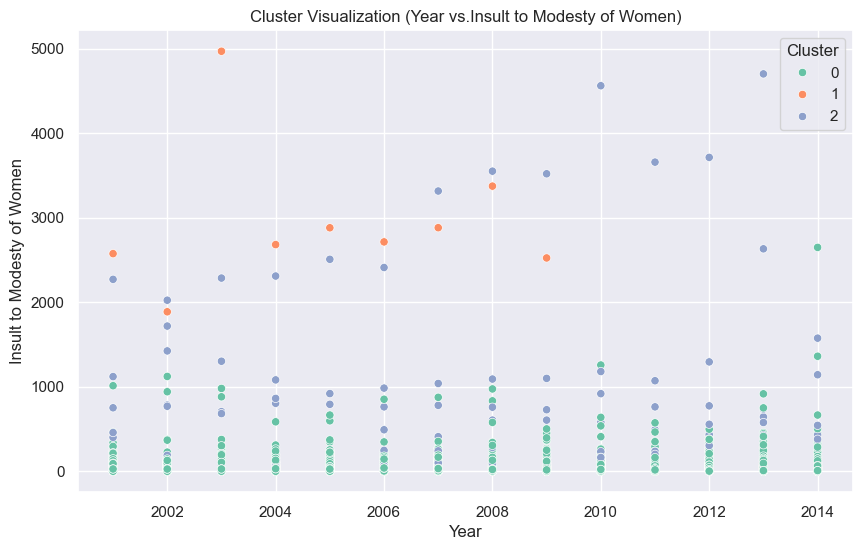

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Year"], y=df["Insult to Modesty of Women"], hue=df["Cluster"], palette="Set2")
plt.title("Cluster Visualization (Year vs.Insult to Modesty of Women)")
plt.xlabel("Year")
plt.ylabel("Insult to Modesty of Women")
plt.legend(title='Cluster')
plt.show()

In [26]:
data_6 = df.iloc[: , [2 ,8]].values
print(data_6)

[[2001  175]
 [2001  154]
 [2001  186]
 ...
 [2014    1]
 [2014    3]
 [2014    4]]


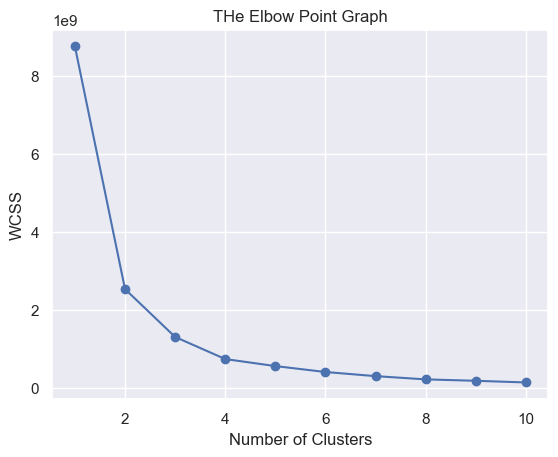

In [29]:
sns.set()
plt.plot(range(1,11),wcss, marker='o')
plt.title('THe Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

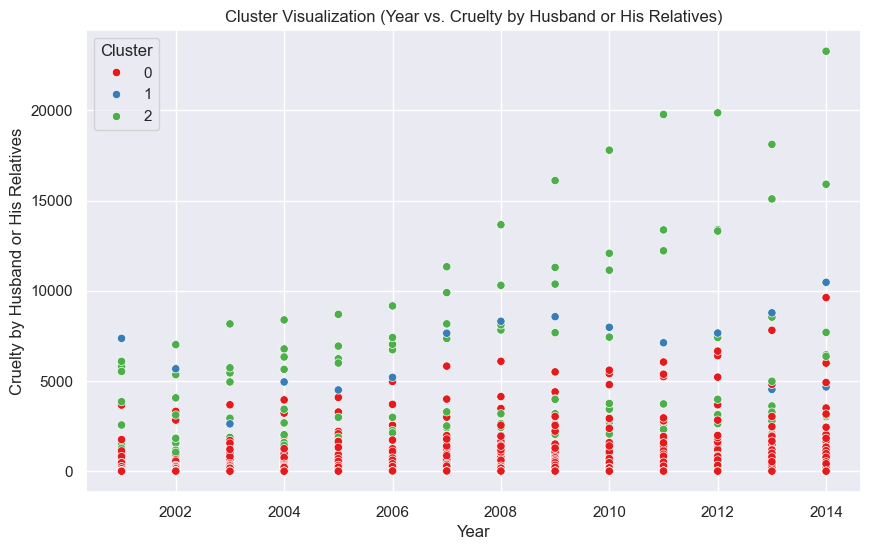

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Year"], y=df["Cruelty by Husband or His Relatives"], hue=df["Cluster"], palette="Set1")
plt.title("Cluster Visualization (Year vs. Cruelty by Husband or His Relatives)")
plt.xlabel("Year")
plt.ylabel("Cruelty by Husband or His Relatives")
plt.legend(title='Cluster')
plt.show()

In [5]:
data_7 = df.iloc[: , [3 ,4]].values
print(data_7)

[[50 30]
 [23 30]
 [27 34]
 ...
 [ 3  1]
 [ 7  6]
 [10  7]]


In [17]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Load dataset
df = pd.read_csv("/mnt/data/Crimes_against_women.csv")

# Convert categorical columns (State, District) to numerical values
label_encoder = LabelEncoder()
df['State'] = label_encoder.fit_transform(df['State'])

# Selecting crime rate features instead of raw counts
crime_features = ['Rape', 'Kidnapping and Abduction', 'Dowry Deaths', 'Assault', 'Insult to Modesty', 'Cruelty by Husband']

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[crime_features])

# Using Elbow Method for optimal k
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8,5))
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

# Optimal Clusters from Hierarchical Clustering
linked = linkage(df_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()

# Applying K-Means with optimal k
optimal_k = 3  # Adjust based on Elbow method
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
df['Cluster_KMeans'] = kmeans.fit_predict(df_scaled)

# Applying DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['Cluster_DBSCAN'] = dbscan.fit_predict(df_scaled)

# Display the updated DataFrame with cluster assignments
print(df[['State', 'Cluster_KMeans', 'Cluster_DBSCAN']].head())
        

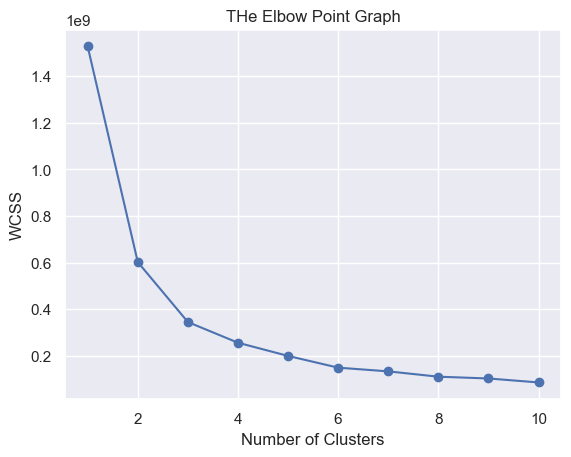

In [10]:
sns.set()
plt.plot(range(1,11),wcss, marker='o')
plt.title('THe Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

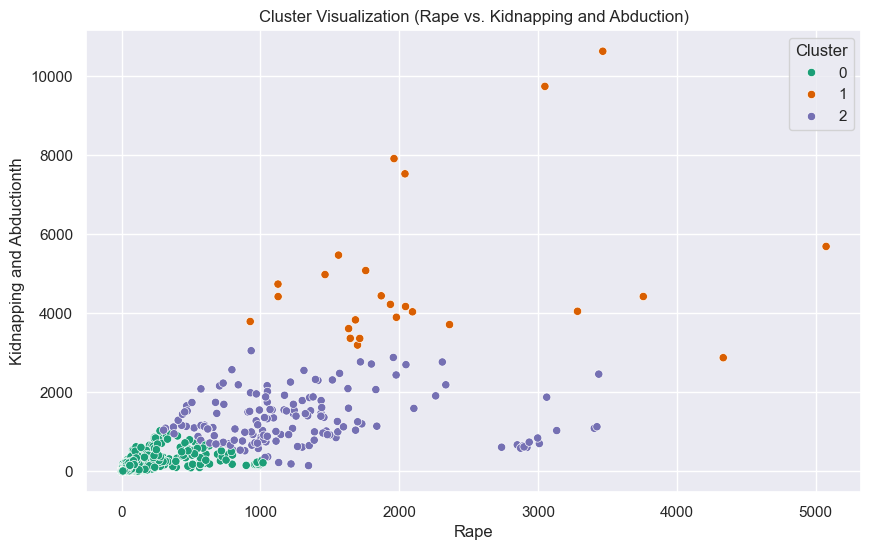

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Rape"], y=df["Kidnapping and Abduction"], hue=df["Cluster"], palette="Dark2")
plt.title("Cluster Visualization (Rape vs. Kidnapping and Abduction)")
plt.xlabel("Rape")
plt.ylabel("Kidnapping and Abductionth")
plt.legend(title='Cluster')
plt.show()


In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Year"], y=df["Rape"], hue=df["Cluster"], palette="viridis")
plt.title("Cluster Visualization (Year vs. Rape Cases)")
plt.xlabel("Year")
plt.ylabel("Rape Cases")
plt.legend(title="Cluster")
plt.show()

In [18]:
data_8 = df.iloc[: , [5 ,6]].values
print(data_8)

[[ 16 149]
 [  7 118]
 [ 14 112]
 ...
 [  0  12]
 [  1  20]
 [  1  32]]


In [21]:
print(df.columns)

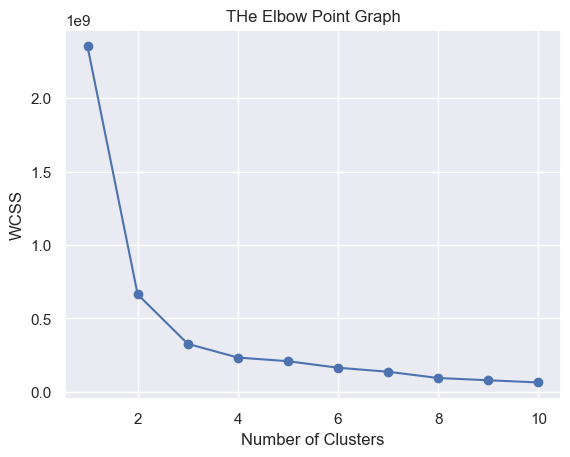

In [22]:
sns.set()
plt.plot(range(1,11),wcss, marker='o')
plt.title('THe Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

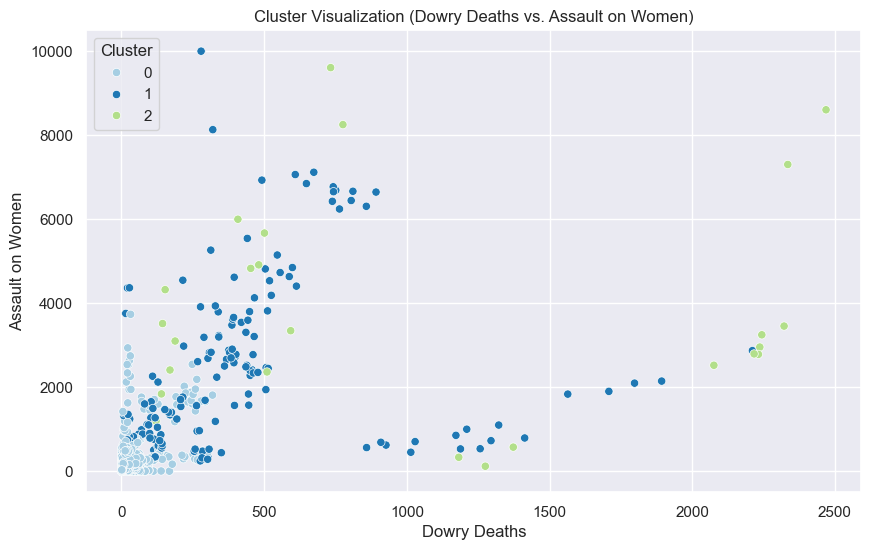

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Dowry Deaths"], y=df["Assault on Women"], hue=df["Cluster"], palette="Paired")
plt.title("Cluster Visualization (Dowry Deaths vs. Assault on Women)")
plt.xlabel("Dowry Deaths")
plt.ylabel("Assault on Women")
plt.legend(title='Cluster')
plt.show()


In [25]:
data_9 = df.iloc[: , [7 ,8]].values
print(data_9)

[[ 34 175]
 [ 24 154]
 [ 83 186]
 ...
 [  1   1]
 [  7   3]
 [  8   4]]


In [26]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Load dataset
df = pd.read_csv("/mnt/data/Crimes_against_women.csv")

# Convert categorical columns (State, District) to numerical values
label_encoder = LabelEncoder()
df['State'] = label_encoder.fit_transform(df['State'])

# Selecting crime rate features instead of raw counts
crime_features = ['Rape', 'Kidnapping and Abduction', 'Dowry Deaths', 'Assault', 'Insult to Modesty', 'Cruelty by Husband']

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[crime_features])

# Using Elbow Method for optimal k
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8,5))
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

# Optimal Clusters from Hierarchical Clustering
linked = linkage(df_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()

# Applying K-Means with optimal k
optimal_k = 3  # Adjust based on Elbow method
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
df['Cluster_KMeans'] = kmeans.fit_predict(df_scaled)

# Applying DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['Cluster_DBSCAN'] = dbscan.fit_predict(df_scaled)

# Display the updated DataFrame with cluster assignments
print(df[['State', 'Cluster_KMeans', 'Cluster_DBSCAN']].head())
        

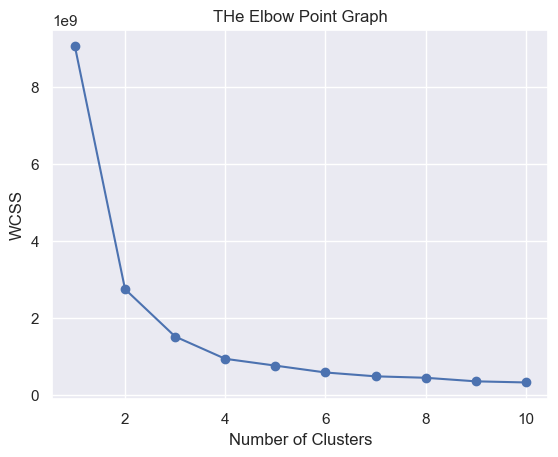

In [27]:
sns.set()
plt.plot(range(1,11),wcss, marker='o')
plt.title('THe Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

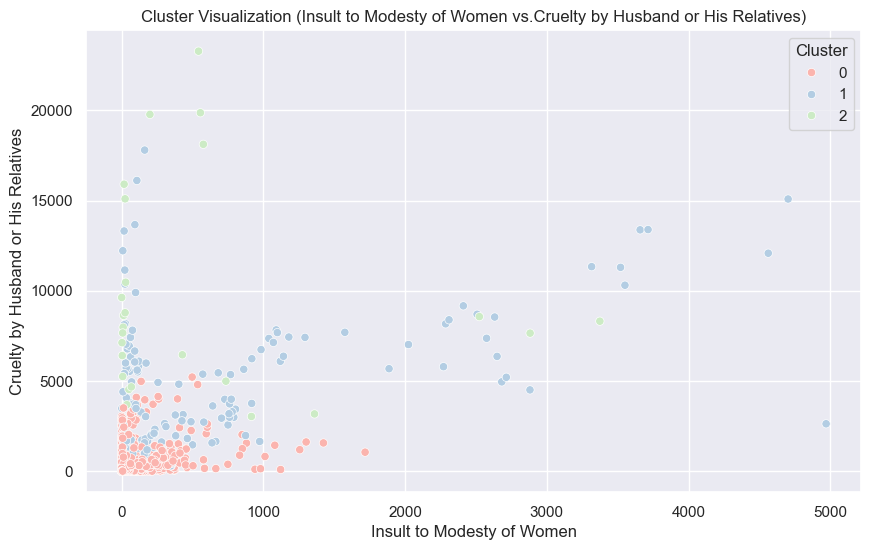

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Insult to Modesty of Women"], y=df["Cruelty by Husband or His Relatives"], hue=df["Cluster"], palette="Pastel1")
plt.title("Cluster Visualization (Insult to Modesty of Women vs.Cruelty by Husband or His Relatives)")
plt.xlabel("Insult to Modesty of Women")
plt.ylabel("Cruelty by Husband or His Relatives")
plt.legend(title='Cluster')
plt.show()


In [26]:
data2 = df.iloc[: , [2 ,4]].values
print(data2)

   State  Cluster
0      3        0
1      3        0
2      3        0
3      3        0
4      3        0


In [29]:
from sklearn.metrics import silhouette_score

silhouette = silhouette_score(df_scaled, clusters)
print(f"Silhouette Score: {silhouette:.4f}")

Silhouette Score: 0.4760


In [30]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(df_scaled, clusters)
print(f"Davies-Bouldin Score: {db_score:.4f}")

Davies-Bouldin Score: 0.8564


In [31]:
from sklearn.metrics import calinski_harabasz_score

ch_score = calinski_harabasz_score(df_scaled, clusters)
print(f"Calinski-Harabasz Score: {ch_score:.4f}")

Calinski-Harabasz Score: 6777.7297


In [ ]:
#Silhouette Score (Higher is better)
#Davies-Bouldin Index (Lower is better)
#Calinski-Harabasz Score (Higher is better)

In [ ]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Load dataset
df = pd.read_csv("/mnt/data/Crimes_against_women.csv")

# Convert categorical columns (State, District) to numerical values
label_encoder = LabelEncoder()
df['State'] = label_encoder.fit_transform(df['State'])

# Selecting crime rate features instead of raw counts
crime_features = ['Rape', 'Kidnapping and Abduction', 'Dowry Deaths', 'Assault', 'Insult to Modesty', 'Cruelty by Husband']

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[crime_features])

# Using Elbow Method for optimal k
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8,5))
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

# Optimal Clusters from Hierarchical Clustering
linked = linkage(df_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()

# Applying K-Means with optimal k
optimal_k = 3  # Adjust based on Elbow method
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
df['Cluster_KMeans'] = kmeans.fit_predict(df_scaled)

# Applying DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['Cluster_DBSCAN'] = dbscan.fit_predict(df_scaled)

# Display the updated DataFrame with cluster assignments
print(df[['State', 'Cluster_KMeans', 'Cluster_DBSCAN']].head())
        


## Conclusion & Insights

### Key Findings:
- The clustering analysis using K-Means suggests distinct patterns in crime distribution against women across different regions.
- Certain areas exhibit significantly higher crime rates, indicating potential hotspots for law enforcement focus.
- Visualization techniques (e.g., scatter plots, heatmaps) helped highlight geographical trends in crime occurrences.

### Limitations:
- The dataset may have missing or inconsistent data, affecting clustering accuracy.
- Only latitude and longitude were used for clustering; adding socio-economic or demographic factors could improve insights.

### Future Recommendations:
- Incorporate time-series analysis to detect trends in crime rates over years.
- Explore other clustering techniques like DBSCAN or Hierarchical Clustering for deeper pattern discovery.
- Use predictive modeling to anticipate high-risk areas and assist law enforcement agencies.
